<a href="https://colab.research.google.com/github/ajdhiman/Deep-Learning/blob/main/CNN_Model_MNIST_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
mnist = tf.keras.datasets.mnist
(xTrainFull, yTrainFull),(xTest, yTest) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
xTrainFull.shape

(60000, 28, 28)

In [4]:
xValid, xTrain =  xTrainFull[:5000]/255, xTrainFull[5000:]/255
yValid, yTrain =  yTrainFull[:5000], yTrainFull[5000:]

xTest = xTest/255

In [5]:
xTrain = np.expand_dims(xTrain, -1)
xValid = np.expand_dims(xValid, -1)
xTest = np.expand_dims(xTest, -1)

In [6]:
print(xTrain.shape,xValid.shape,xTest.shape)

(55000, 28, 28, 1) (5000, 28, 28, 1) (10000, 28, 28, 1)


In [7]:
classes = len(np.unique(yTrain))

In [8]:
from keras.api._v2.keras.layers import Flatten
layers=[
    tf.keras.Input(shape=(28,28,1),name="inputlayer"),
    tf.keras.layers.Conv2D(32,kernel_size=(3,3),activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(64,kernel_size=(3,3),activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(classes, activation="softmax"),
]

In [9]:
model = tf.keras.models.Sequential(layers)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 10)                1

In [10]:
loss="sparse_categorical_crossentropy"
optimizer= "SGD"
metrics= ["accuracy"]
model.compile(optimizer=optimizer,loss=loss, metrics=metrics)

In [11]:
epochs = 30
validation = (xValid, yValid)
history = model.fit(xTrain, yTrain, epochs=epochs,validation_data=validation, batch_size=32 )

Epoch 1/30
1719/1719 [==============================] - 20s 4ms/step - loss: 0.5649 - accuracy: 0.8399 - val_loss: 0.2037 - val_accuracy: 0.9430
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1673 - accuracy: 0.9510 - val_loss: 0.1295 - val_accuracy: 0.9642
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1186 - accuracy: 0.9649 - val_loss: 0.1022 - val_accuracy: 0.9710
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0965 - accuracy: 0.9711 - val_loss: 0.0882 - val_accuracy: 0.9740
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0841 - accuracy: 0.9749 - val_loss: 0.0807 - val_accuracy: 0.9766
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0748 - accuracy: 0.9773 - val_loss: 0.0745 - val_accuracy: 0.9780
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0681 - accuracy: 0.9792 - val_loss: 0.0747 - val_accuracy

In [12]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


<function matplotlib.pyplot.show(close=None, block=None)>

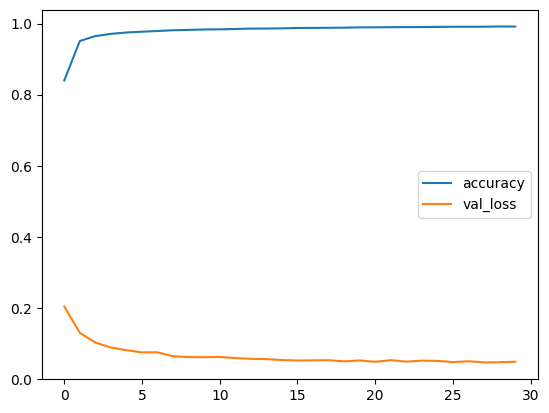

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_loss'])
plt.legend(['accuracy','val_loss'])
plt.show

In [14]:
model.evaluate(xTest,yTest)

313/313 [==============================] - 1s 3ms/step - loss: 0.0388 - accuracy: 0.9879


[0.038803018629550934, 0.9879000186920166]

In [15]:
model.save("mnistCNNModel.H5")

In [19]:
xNew = xTest[:3]
yProbablity = model.predict(xNew)
yProbablity.round(3)

1/1 [==============================] - 0s 155ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [20]:
yPred = np.argmax(yProbablity,axis=-1)
yPred

array([7, 2, 1])

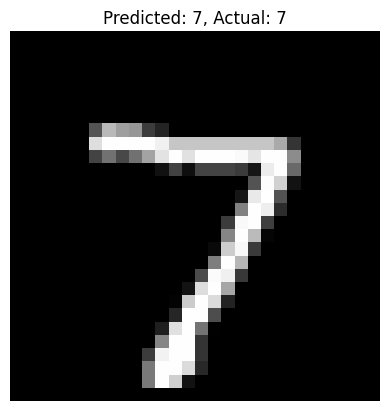

------------------------------------------------------------


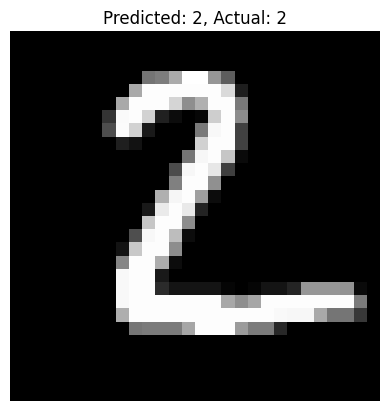

------------------------------------------------------------


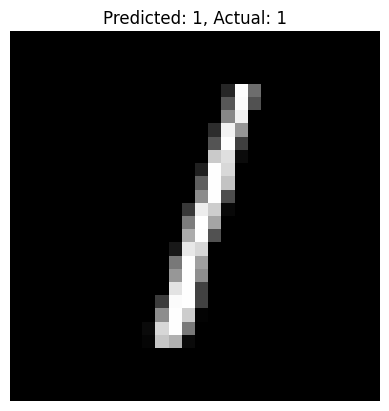

------------------------------------------------------------


In [21]:
for img_array, pred, actual in zip(xNew, yPred, yTest[:3]):
  plt.imshow(img_array,cmap="gray")
  plt.title(f"Predicted: {pred}, Actual: {actual}")
  plt.axis("off")
  plt.show()
  print("--"*30)

# CNN Transfer Learning

In [24]:
pre_trained_model = tf.keras.models.load_model("mnistCNNModel.H5")
pre_trained_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 10)                1

In [25]:
for layer in pre_trained_model.layers:
  print(f"{layer.name} : {layer.trainable}")

conv2d : True
max_pooling2d : True
conv2d_1 : True
max_pooling2d_1 : True
flatten : True
dense : True


In [26]:
for layer in pre_trained_model.layers[:-1]: #Leaving softmax layer for binary even odd classification
  layer.trainable = False

In [51]:
for layer in pre_trained_model.layers:
  print(f"{layer.name} : {layer.trainable}")

lower_pretrained_layers =  pre_trained_model.layers[:-1]

conv2d : False
max_pooling2d : False
conv2d_1 : False
max_pooling2d_1 : False
flatten : False
dense : True


In [59]:
model_EvenOdd = tf.keras.models.Sequential(lower_pretrained_layers)
model_EvenOdd.add(
    tf.keras.layers.Dense(2, activation="softmax")
)

In [60]:
model_EvenOdd.build((0,28,28,1))

model_EvenOdd.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             multiple                  320       
                                                                 
 max_pooling2d (MaxPooling2D  multiple                 0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           multiple                  18496     
                                                                 
 max_pooling2d_1 (MaxPooling  multiple                 0         
 2D)                                                             
                                                                 
 flatten (Flatten)           multiple                  0         
                                                                 
 dense_6 (Dense)             (0, 2)                  

In [61]:
def update_even_odd_labels(labels):
  for i, label in enumerate(labels):
    labels[i] = np.where(label%2==0,1,0) #1 is Even, 0 is Odd

  return labels

In [62]:
 yTrain_EvenOdd, yTest_EvenOdd, yValid_EvenOdd = update_even_odd_labels([yTrain, yTest, yValid])

In [63]:
loss="sparse_categorical_crossentropy"
optimizer= "SGD"
metrics= ["accuracy"]

model_EvenOdd.compile(
    loss=loss, optimizer=optimizer, metrics=metrics
)

In [64]:
epochs = 10
validation = (xValid, yValid_EvenOdd)
history = model_EvenOdd.fit(xTrain, yTrain_EvenOdd, epochs=epochs,validation_data=validation, batch_size=32 )

Epoch 1/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1761 - accuracy: 0.9490 - val_loss: 0.0960 - val_accuracy: 0.9652
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0808 - accuracy: 0.9718 - val_loss: 0.0748 - val_accuracy: 0.9762
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0721 - accuracy: 0.9746 - val_loss: 0.0587 - val_accuracy: 0.9804
Epoch 4/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0670 - accuracy: 0.9771 - val_loss: 0.0627 - val_accuracy: 0.9788
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0644 - accuracy: 0.9777 - val_loss: 0.0715 - val_accuracy: 0.9762
Epoch 6/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0621 - accuracy: 0.9788 - val_loss: 0.0770 - val_accuracy: 0.9742
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0576 - accuracy: 0.9799 - val_loss: 0.0650 - val_accuracy:

In [65]:
model.evaluate(xTest,yTest_EvenOdd)

313/313 [==============================] - 2s 6ms/step - loss: 20.6585 - accuracy: 0.0012


[20.658504486083984, 0.0012000000569969416]

In [66]:
New = xTest[:3]
yProbablity = model_EvenOdd.predict(xNew)
yProbablity.round(3)

1/1 [==============================] - 0s 58ms/step


array([[1.   , 0.   ],
       [0.002, 0.998],
       [0.997, 0.003]], dtype=float32)

In [67]:
yPred = np.argmax(yProbablity,axis=-1)
yPred

array([0, 1, 0])

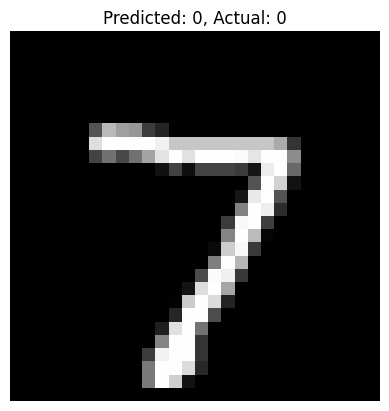

------------------------------------------------------------


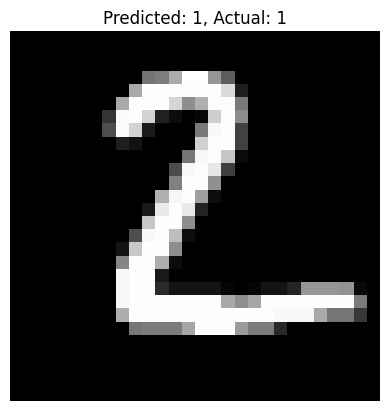

------------------------------------------------------------


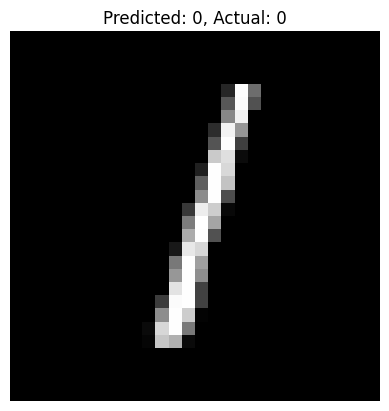

------------------------------------------------------------


In [68]:
for img_array, pred, actual in zip(xNew, yPred, yTest_EvenOdd[:3]):
  plt.imshow(img_array,cmap="gray")
  plt.title(f"Predicted: {pred}, Actual: {actual}")
  plt.axis("off")
  plt.show()
  print("--"*30)